In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('Nigeria_housing.csv')
df = df.copy()
df.head()

,Description,House_type,Location,Price
0,Office space for rent,"180sqm Fully Partitioned, Furnished And Servic...","Sokode Crescent, Zone 5, Wuse, Abuja","5,300,000"
1,1 bedroom mini flat (room and parlour) for rent,Clean And Spacious Miniflat,"Ikate ( Salem), Lekki, Lagos","1,700,000"
2,4 bedroom terraced duplex for rent,Luxury 4bedrooms Terrace House With A Room Bq,"5, Chris Chapel Street, Lekki Scheme 1, Lekk...","8,500,000"
3,4 bedroom terraced duplex for rent,Brand New 4 Bedroom Terrace Duplex With Privat...,"Maitama Main, Maitama District, Abuja","25,000,000"
4,3 bedroom flat / apartment for rent,Well Maintained Spacious 3 Bedrooms Apartment ...,"Abioro Street, Ikate Elegushi, Lekki, Lagos","4,500,000"


In [4]:
#Getting info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20979 entries, 0 to 20978
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  20979 non-null  object
 1   House_type   20979 non-null  object
 2   Location     20979 non-null  object
 3   Price        20979 non-null  object
dtypes: object(4)
memory usage: 655.7+ KB


In [5]:
#Check number of missing data
df.isna().sum()

Description    0
House_type     0
Location       0
Price          0
dtype: int64

In [6]:
#Replacing special characters from the price column
df['Price'] = df['Price'].str.replace('[^\d\-+\.]', '', regex=True)

#changing dtype to numeric
df['Price'] = pd.to_numeric(df['Price'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20979 entries, 0 to 20978
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  20979 non-null  object
 1   House_type   20979 non-null  object
 2   Location     20979 non-null  object
 3   Price        20979 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 655.7+ KB


In [8]:
#Getting state and address from location column
df[['Address', 'State']] = df['Location'].str.rsplit(',', n=1, expand=True)
df.head()

,Description,House_type,Location,Price,Address,State
0,Office space for rent,"180sqm Fully Partitioned, Furnished And Servic...","Sokode Crescent, Zone 5, Wuse, Abuja",5300000,"Sokode Crescent, Zone 5, Wuse",Abuja
1,1 bedroom mini flat (room and parlour) for rent,Clean And Spacious Miniflat,"Ikate ( Salem), Lekki, Lagos",1700000,"Ikate ( Salem), Lekki",Lagos
2,4 bedroom terraced duplex for rent,Luxury 4bedrooms Terrace House With A Room Bq,"5, Chris Chapel Street, Lekki Scheme 1, Lekk...",8500000,"5, Chris Chapel Street, Lekki Scheme 1, Lekk...",Lagos
3,4 bedroom terraced duplex for rent,Brand New 4 Bedroom Terrace Duplex With Privat...,"Maitama Main, Maitama District, Abuja",25000000,"Maitama Main, Maitama District",Abuja
4,3 bedroom flat / apartment for rent,Well Maintained Spacious 3 Bedrooms Apartment ...,"Abioro Street, Ikate Elegushi, Lekki, Lagos",4500000,"Abioro Street, Ikate Elegushi, Lekki",Lagos


In [9]:
#Extracting city and street from address column
df[['street', 'city']] = df['Address'].str.rsplit(',', n=1, expand=True)
df.head()

,Description,House_type,Location,Price,Address,State,street,city
0,Office space for rent,"180sqm Fully Partitioned, Furnished And Servic...","Sokode Crescent, Zone 5, Wuse, Abuja",5300000,"Sokode Crescent, Zone 5, Wuse",Abuja,"Sokode Crescent, Zone 5",Wuse
1,1 bedroom mini flat (room and parlour) for rent,Clean And Spacious Miniflat,"Ikate ( Salem), Lekki, Lagos",1700000,"Ikate ( Salem), Lekki",Lagos,Ikate ( Salem),Lekki
2,4 bedroom terraced duplex for rent,Luxury 4bedrooms Terrace House With A Room Bq,"5, Chris Chapel Street, Lekki Scheme 1, Lekk...",8500000,"5, Chris Chapel Street, Lekki Scheme 1, Lekk...",Lagos,"5, Chris Chapel Street, Lekki Scheme 1, Lekk...",Lekki
3,4 bedroom terraced duplex for rent,Brand New 4 Bedroom Terrace Duplex With Privat...,"Maitama Main, Maitama District, Abuja",25000000,"Maitama Main, Maitama District",Abuja,Maitama Main,Maitama District
4,3 bedroom flat / apartment for rent,Well Maintained Spacious 3 Bedrooms Apartment ...,"Abioro Street, Ikate Elegushi, Lekki, Lagos",4500000,"Abioro Street, Ikate Elegushi, Lekki",Lagos,"Abioro Street, Ikate Elegushi",Lekki


In [10]:
#Droping Location and address
df.drop(['Location', 'Address'], axis=1, inplace=True)
df.head()

,Description,House_type,Price,State,street,city
0,Office space for rent,"180sqm Fully Partitioned, Furnished And Servic...",5300000,Abuja,"Sokode Crescent, Zone 5",Wuse
1,1 bedroom mini flat (room and parlour) for rent,Clean And Spacious Miniflat,1700000,Lagos,Ikate ( Salem),Lekki
2,4 bedroom terraced duplex for rent,Luxury 4bedrooms Terrace House With A Room Bq,8500000,Lagos,"5, Chris Chapel Street, Lekki Scheme 1, Lekk...",Lekki
3,4 bedroom terraced duplex for rent,Brand New 4 Bedroom Terrace Duplex With Privat...,25000000,Abuja,Maitama Main,Maitama District
4,3 bedroom flat / apartment for rent,Well Maintained Spacious 3 Bedrooms Apartment ...,4500000,Lagos,"Abioro Street, Ikate Elegushi",Lekki


In [11]:
#To remove the special characters from city column
df['city'] = df['city'].str.replace(r'\W', '', regex=True)
df.head()
#To remove the special characters from State column
df['State'] = df['State'].str.replace(r'\W', '', regex=True)
df.head()

,Description,House_type,Price,State,street,city
0,Office space for rent,"180sqm Fully Partitioned, Furnished And Servic...",5300000,Abuja,"Sokode Crescent, Zone 5",Wuse
1,1 bedroom mini flat (room and parlour) for rent,Clean And Spacious Miniflat,1700000,Lagos,Ikate ( Salem),Lekki
2,4 bedroom terraced duplex for rent,Luxury 4bedrooms Terrace House With A Room Bq,8500000,Lagos,"5, Chris Chapel Street, Lekki Scheme 1, Lekk...",Lekki
3,4 bedroom terraced duplex for rent,Brand New 4 Bedroom Terrace Duplex With Privat...,25000000,Abuja,Maitama Main,MaitamaDistrict
4,3 bedroom flat / apartment for rent,Well Maintained Spacious 3 Bedrooms Apartment ...,4500000,Lagos,"Abioro Street, Ikate Elegushi",Lekki


In [12]:
#Getting the unique cities
df['city'].unique()

array(['Wuse', 'Lekki', 'MaitamaDistrict', 'Ajah', 'Ikoyi', None,
       'Ibadan', 'Ikeja', 'Gbagada', 'Jahi', 'Katampe', 'IbejuLekki',
       'Galadimawa', 'Ojo', 'VictoriaIslandVI', 'Gwarinpa', 'Suleja',
       'Ogudu', 'Magodo', 'Ibafo', 'Wuse2', 'Ojota', 'Apo', 'Yaba',
       'AsokoroDistrict', 'Isolo', 'Surulere', 'Ikorodu', 'Ketu',
       'Alimosho', 'Maryland', 'Garki', 'Ipaja', 'IsheriNorth',
       'LokogomaDistrict', 'IduIndustrial', 'PortHarcourt', 'Shomolu',
       'Ojodu', 'LugbeDistrict', 'Gudu', 'Enugu', 'Kubwa',
       'GuzapeDistrict', 'LagosIsland', 'Jabi', 'Warri', 'Kaura', 'Apapa',
       'Ikotun', 'Dutse', 'Oshodi', 'Utako', 'Agege',
       'CentralBusinessDistrict', 'AmuwoOdofin', 'Wuye', 'Kukwaba',
       'Karu', 'LifeCamp', 'Magboro', 'Arepo', 'Gaduwa', 'Mabushi',
       'Durumi', 'Mani', 'IfakoIjaiye', 'EkoAtlanticCity', 'Karmo',
       'MboraNbora', 'Ijesha', 'Oredo', 'Dape', 'Dakibiyu', 'Karsana',
       'Zuba', 'Kosofe', 'Bwari', 'Mushin', 'IbadanNorth', 'Sa

In [13]:
#number of cities
city = len(df['city'].unique())
city

117

In [14]:
#number of houses
House = len(df['House_type'].unique())
House

13743

In [15]:
#Getting the Average price of  houses in the each city
Avg = df.groupby('city').mean().astype(np.int64)
Avg

,Price
city,
AbeokutaNorth,3500000
AbeokutaSouth,1233333
AdoOdoOta,1492857
Agege,4102956
Ajah,2355227
...,...
Wuse,5544136
Wuse2,10738906
Wuye,3755555


In [16]:
#Most Popular House_type
df.groupby('House_type')['Description'].count().sort_values(ascending=False)

House_type
2 Bedroom Flat                                                        201
Room Self Contain                                                     180
Tastefully Finished 4 Bedroom Terraced House With Private Elevator    177
Mini Flat                                                             173
Brand New 2 Bedroom All Ensuite Apartment In An Estate                171
                                                                     ... 
Eventmata Halls & Garden                                                1
Events Venue/ Function Hall                                             1
Excellent 2 Bedroom Apartment                                           1
Excellent 3 Bedroom Apartment                                           1
Â 2 Bedroom Apartment                                                   1
Name: Description, Length: 13743, dtype: int64

In [17]:
#most popular house_type
house_typ = df['House_type'].value_counts()
Pop_house = house_typ.idxmax()
print(f'The most popular house type is: {Pop_house}')

The most popular house type is: 2 Bedroom Flat


# Average price for House_type

In [18]:
#Getting the Average price for house_type
House_type = df.groupby('House_type').mean().sort_values(by='Price',ascending=False).astype(np.int64)
House_type

,Price
House_type,
Topnotch 3 Bedroom Fully Serviced & Furnished Terraces Duplex,15000000000
Spacious 5 Bedroom Semi Detached Duplex,5507500000
Spacious 3 Bedroom Apartments,3501500000
Lovely 3 Bedroom Apartments,2339500000
A Functioning Tank Farm,1500000000
...,...
A Serviced Open Office Space Plan,350
Luxurious Fully Serviced 687 Sqms Office Space,250
687 Square Meters Letable Floor Space,250


# Average price for each state

In [19]:
#number of States
No_of_states = len(df['State'].unique())
print(No_of_states)

15


In [20]:
#Average price house for each state
state = df.groupby('State')['Price'].mean().sort_values(ascending=False).astype(np.int64)
state

State
Abuja       15430777
Lagos        9747239
Katsina      6000000
Ogun         5598465
Enugu        4581666
Rivers       4116977
Oyo          3267448
Anambra      2350000
AkwaIbom     1571590
Delta        1261111
Niger         833333
Imo           750000
Edo           660000
Abia          400000
Osun          300000
Name: Price, dtype: int64

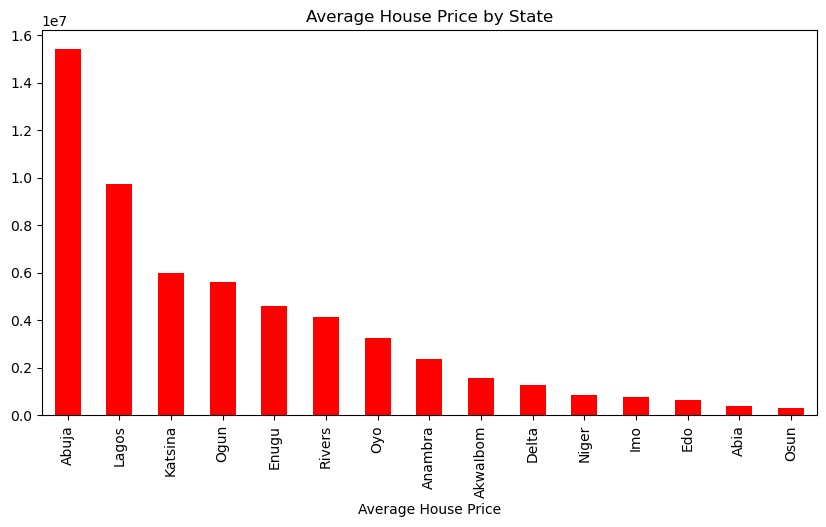

In [21]:
plt.figure(figsize=(10,5))
state.plot(kind='bar', color='red')
plt.xlabel('Average House Price')
plt.title('Average House Price by State')
plt.show()

# State with the Max and Min Average price

In [36]:
#State and city with the Max and Min Average price
Mx_Mn = df.groupby('State').max().sort_values(by='Price', ascending=False)
Mx_Mn

,Description,House_type,Price,street
State,,,,
Abuja,Warehouse for rent,Work Station,15000000000,"Zone E, Flomax Plaza"
Lagos,Warehouse for rent,Â 2 Bedroom Apartment,11000000000,"Zone C, Nicon Town"
Ogun,Warehouse for rent,Well Finished And Spacious 2 Bedroom Flat At F...,400000000,"Wendy Garuba Estate, Berger"
Rivers,Warehouse for rent,Well Maintained 4 Bedroom Detached House With ...,90000000,"Woji Road., Woji"
Oyo,Warehouse for rent,Very Large Office Space,75000000,"Tiger Mini Estate, Along Ojoo Express, Ojoo"
Enugu,Warehouse for rent,Self Contained,25000000,Thinkers Corner
AkwaIbom,Office space for rent,"Standard, Well Finished 5 Bedroom Detached Dup...",8000000,Uyeh Estate
Katsina,3 bedroom flat / apartment for rent,Fully Furnished Serviced 3 Bedroom Apartment,6000000,Off Spar Road
Anambra,5 bedroom semi-detached duplex for rent,Exquisite Two-bedroom Apartment,4000000,"Gra, Awka"


# For Houses in Lagos

In [23]:
#For Houses in Lagos
state_data = df[df['State'] == 'Lagos']
state_data.head()

,Description,House_type,Price,State,street,city
1,1 bedroom mini flat (room and parlour) for rent,Clean And Spacious Miniflat,1700000,Lagos,Ikate ( Salem),Lekki
2,4 bedroom terraced duplex for rent,Luxury 4bedrooms Terrace House With A Room Bq,8500000,Lagos,"5, Chris Chapel Street, Lekki Scheme 1, Lekk...",Lekki
4,3 bedroom flat / apartment for rent,Well Maintained Spacious 3 Bedrooms Apartment ...,4500000,Lagos,"Abioro Street, Ikate Elegushi",Lekki
5,1 bedroom mini flat (room and parlour) for rent,Brand New 1 Bedroom Apartment,3500000,Lagos,Ikate,Lekki
6,3 bedroom terraced duplex for rent,Brand New Fully Serviced 3 Bedroom Duplex,3500000,Lagos,"Orchid Road, Chevron Toll Gate",Lekki


In [24]:
# Group by city and calculate average price
grouped = state_data.groupby('city')['Price'].mean().sort_values(ascending=False)
grouped.head()

city
Ojota      6.205000e+07
Ilupeju    5.276000e+07
Ikoyi      2.794341e+07
Oshodi     2.339795e+07
Apapa      1.970797e+07
Name: Price, dtype: float64

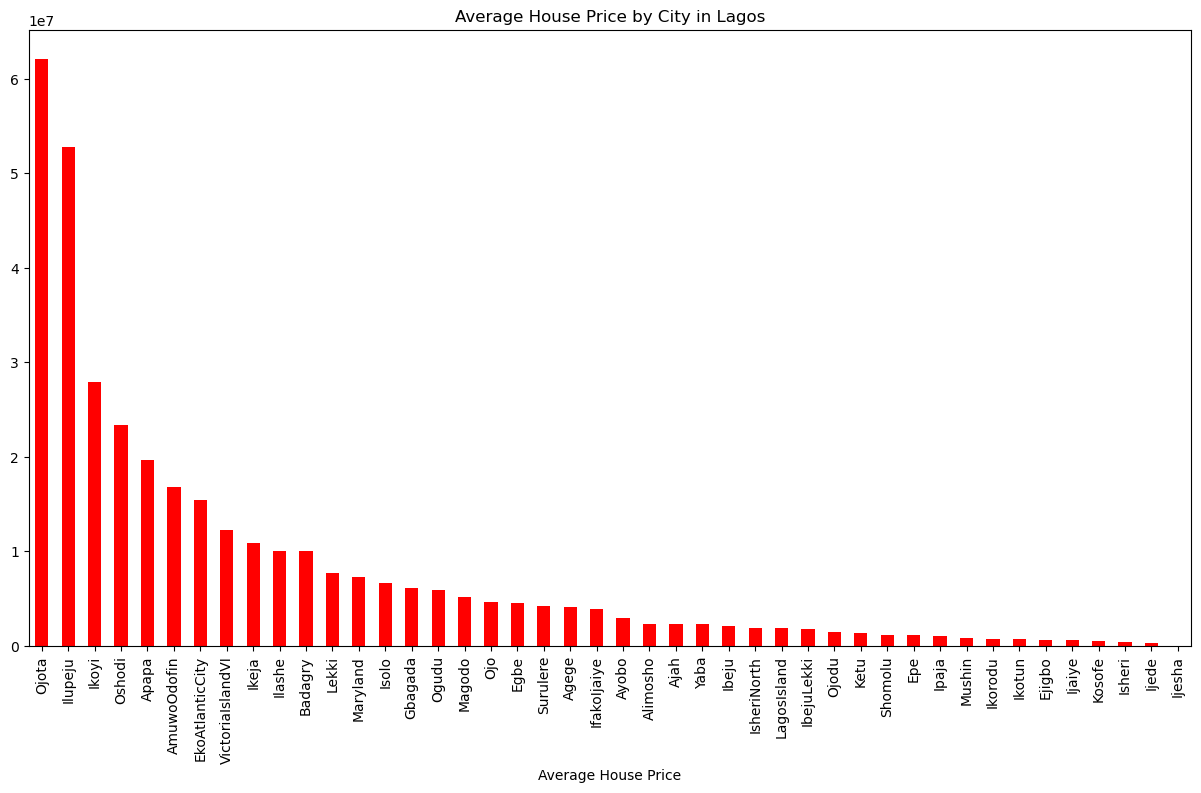

In [25]:
plt.figure(figsize=(15,8))
grouped.plot(kind='bar', color='red')
plt.xlabel('Average House Price')
plt.title('Average House Price by City in Lagos')
plt.show()

In [26]:
#Getting the houses in Lekki
df[df['city']=='Lekki']

,Description,House_type,Price,State,street,city
1,1 bedroom mini flat (room and parlour) for rent,Clean And Spacious Miniflat,1700000,Lagos,Ikate ( Salem),Lekki
2,4 bedroom terraced duplex for rent,Luxury 4bedrooms Terrace House With A Room Bq,8500000,Lagos,"5, Chris Chapel Street, Lekki Scheme 1, Lekk...",Lekki
4,3 bedroom flat / apartment for rent,Well Maintained Spacious 3 Bedrooms Apartment ...,4500000,Lagos,"Abioro Street, Ikate Elegushi",Lekki
5,1 bedroom mini flat (room and parlour) for rent,Brand New 1 Bedroom Apartment,3500000,Lagos,Ikate,Lekki
6,3 bedroom terraced duplex for rent,Brand New Fully Serviced 3 Bedroom Duplex,3500000,Lagos,"Orchid Road, Chevron Toll Gate",Lekki
...,...,...,...,...,...,...
20967,5 bedroom detached duplex for rent,Luxury 5 Bedroom Detached Duplex,7500000,Lagos,Chevron Drive,Lekki
20969,3 bedroom flat / apartment for rent,An Exquisite 3 Bedroom Maisonette Apartment,5000000,Lagos,"Marwa, Lekki Phase 1",Lekki
20971,4 bedroom house for rent,4 Bedroom Terrace Duplex,4500000,Lagos,Conservation By Chevron Toll Gate,Lekki
20972,1 bedroom mini flat (room and parlour) for rent,Standard Room And Parlour,650000,Lagos,"Destiny Homes Estate, Abijo",Lekki


In [27]:
#Getting the price of Houses in Lekki
dfc = df.groupby('city').get_group('Lekki')['Price']
print(dfc)

1        1700000
2        8500000
4        4500000
5        3500000
6        3500000
          ...   
20967    7500000
20969    5000000
20971    4500000
20972     650000
20973    3500000
Name: Price, Length: 8055, dtype: int64


# Getting price of houses of in porthartcourt

In [28]:
#Getting price of houses of in porthartcourt
Rivers = df[df['State']== 'Rivers']
Rivers

,Description,House_type,Price,State,street,city
445,Self contain (single rooms) for rent,Standard Self-contained In An Estate.,250000,Rivers,"Oro-igwe, Rumuduru",PortHarcourt
446,1 bedroom flat / apartment for rent,1 Bedroom Flat In An Estate.,280000,Rivers,"Oro-igwe Rumuewhara/elimgbu Link Road, Elimbu",PortHarcourt
448,2 bedroom flat / apartment for rent,Standard 2 Bedroom Flat,650000,Rivers,Eneka,PortHarcourt
449,2 bedroom flat / apartment for rent,Standard 2 Bedrooms Flat In An Estate,600000,Rivers,"Greenland Estate, Rumunduru",PortHarcourt
553,3 bedroom terraced duplex for rent,Brand New And Tastefully Finished 3 Bedroom Te...,3500000,Rivers,"Peter Odili Road, Trans Amadi",PortHarcourt
...,...,...,...,...,...,...
20779,2 bedroom flat / apartment for rent,Super Standard 2 Bedroom Flat With Federal Light,1800000,Rivers,"Royal Avenue Estate Peter Odili Road, Trans ...",PortHarcourt
20861,2 bedroom flat / apartment for rent,Clean 2 Bedroom Flat In A Gated Estate With Mo...,1200000,Rivers,"Centenary Gardens Estate Shell Cooperative, ...",PortHarcourt
20872,Plaza / complex / mall for rent,Serviced And Fully Operational Office Complex ...,26000000,Rivers,Ada George Road,PortHarcourt
20873,2 bedroom flat / apartment for rent,Luxury 2 Bedroom Apartment In A Good Neighborhood,2500000,Rivers,Rumuokkwuta Nta Road,PortHarcourt


In [29]:
PH = Rivers.groupby('city')['Price'].mean().sort_values(ascending=False)
PH

city
PortHarcourt    4.125057e+06
Name: Price, dtype: float64

In [30]:
#Getting average price of house in PortHarcourt
df[df['city']== 'PortHarcourt'].mean().astype(np.int64)
#df.groupby('city').get_group('PortHarcourt')['Price'].mean().astype(np.int64)

Price    4125057
dtype: int64

In [31]:
df.head()

,Description,House_type,Price,State,street,city
0,Office space for rent,"180sqm Fully Partitioned, Furnished And Servic...",5300000,Abuja,"Sokode Crescent, Zone 5",Wuse
1,1 bedroom mini flat (room and parlour) for rent,Clean And Spacious Miniflat,1700000,Lagos,Ikate ( Salem),Lekki
2,4 bedroom terraced duplex for rent,Luxury 4bedrooms Terrace House With A Room Bq,8500000,Lagos,"5, Chris Chapel Street, Lekki Scheme 1, Lekk...",Lekki
3,4 bedroom terraced duplex for rent,Brand New 4 Bedroom Terrace Duplex With Privat...,25000000,Abuja,Maitama Main,MaitamaDistrict
4,3 bedroom flat / apartment for rent,Well Maintained Spacious 3 Bedrooms Apartment ...,4500000,Lagos,"Abioro Street, Ikate Elegushi",Lekki


In [32]:
# fill missing values with the mean
df['Price'] = df['Price'].fillna(df['Price'].mean())

In [33]:
df

,Description,House_type,Price,State,street,city
0,Office space for rent,"180sqm Fully Partitioned, Furnished And Servic...",5300000,Abuja,"Sokode Crescent, Zone 5",Wuse
1,1 bedroom mini flat (room and parlour) for rent,Clean And Spacious Miniflat,1700000,Lagos,Ikate ( Salem),Lekki
2,4 bedroom terraced duplex for rent,Luxury 4bedrooms Terrace House With A Room Bq,8500000,Lagos,"5, Chris Chapel Street, Lekki Scheme 1, Lekk...",Lekki
3,4 bedroom terraced duplex for rent,Brand New 4 Bedroom Terrace Duplex With Privat...,25000000,Abuja,Maitama Main,MaitamaDistrict
4,3 bedroom flat / apartment for rent,Well Maintained Spacious 3 Bedrooms Apartment ...,4500000,Lagos,"Abioro Street, Ikate Elegushi",Lekki
...,...,...,...,...,...,...
20974,Plaza / complex / mall for rent,Newly Built Plaza,25000000,Abuja,Dawaki,Gwarinpa
20975,Self contain (single rooms) for rent,"Standard Single Room, Self Contain",400000,Lagos,"Peace Land Estate, Off Abraham Adesenya, Ogombo",Ajah
20976,4 bedroom terraced duplex for rent,Standard 4 Bedroom Terrace Duplex With Bq,5000000,Abuja,Around Living Faith Church,Jahi
20977,3 bedroom detached bungalow for rent,Sharp 3 Bedroom Bungalow (alone In The Compound),3500000,Abuja,Gwarinpa Extension,Gwarinpa


In [34]:
dfR = df.corr()
dfR

,Price
Price,1.0


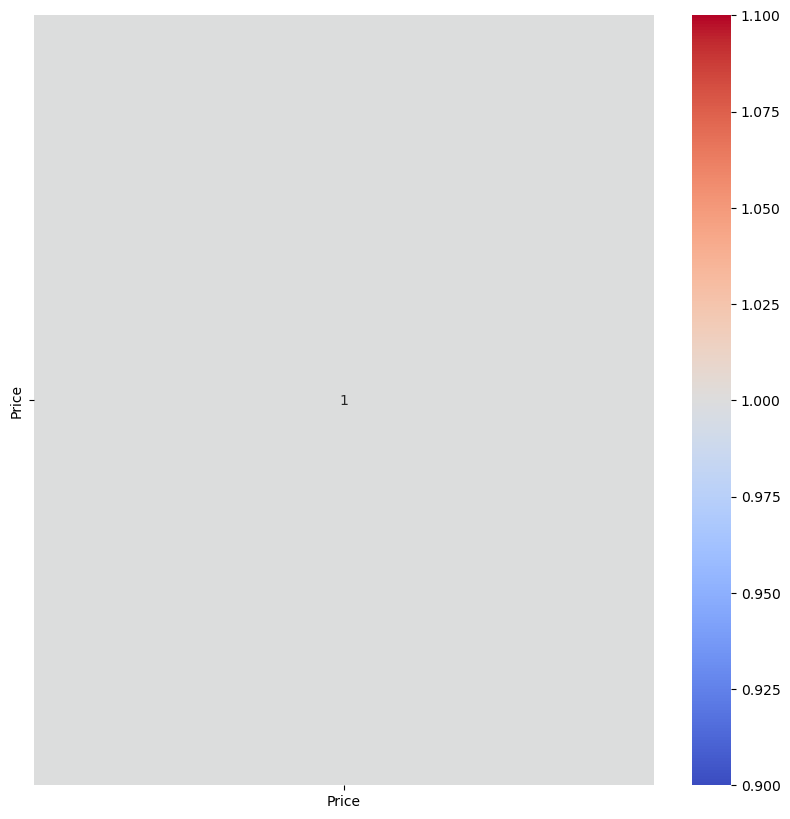

In [35]:
# Creating a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(dfR, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()